In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

In [3]:
data = pd.read_csv('../data/revised_weather.csv')

In [4]:
data['date_time'] = data['dt'].apply(lambda x: pd.to_datetime(x))

data['date_time']

data['date'] = data['date_time'].apply(lambda x: x.date())

temp_by_date = data.groupby(by='date')['temp'].agg(['min','max','mean'])

temp_by_date['diff'] = temp_by_date['max'] - temp_by_date['min']

temp_by_date['dt'] = temp_by_date.index.to_series()
temp_by_date['month'] = temp_by_date['dt'].apply(lambda x: x.month)

# we define a dictionnary with months that we'll use later
month_dict = {1: 'january',
              2: 'february',
              3: 'march',
              4: 'april',
              5: 'may',
              6: 'june',
              7: 'july',
              8: 'august',
              9: 'september',
              10: 'october',
              11: 'november',
              12: 'december'}

month_mean_series = temp_by_date.groupby('month')['mean'].mean()

temp_by_date['mean_month'] = temp_by_date['month'].map(month_mean_series)

temp_by_date.drop(columns='dt', inplace=True)

# Have to flatten the data frame because the index is 2-D
temp_by_date = temp_by_date.reset_index() 

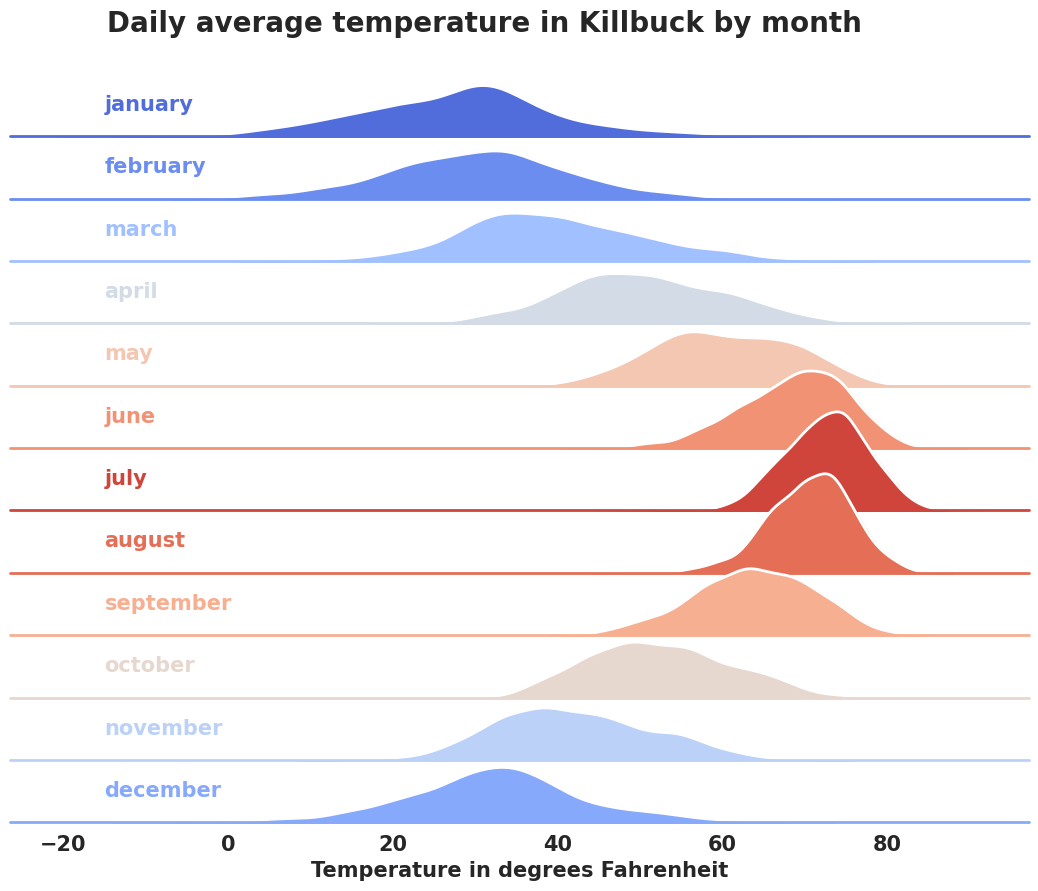

In [5]:
sns.set_theme(style="white", rc={"axes.facecolor": (1,1,1, 0)})

c_palette = sns.color_palette(palette='coolwarm', n_colors=12)
g = sns.FacetGrid(temp_by_date, row='month', hue='mean_month', aspect=15, height=0.75, palette=c_palette)

# Each kde or ridgline plot
g.map(sns.kdeplot, 'mean',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# White line for contour
g.map(sns.kdeplot, 'mean', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# Horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    ax.set_ylabel('')
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.4)

# eventually we remove axes titles, yticks and spines
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degrees Fahrenheit', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature in Killbuck by month',
               ha='center',
               fontsize=20,
               fontweight='bold')

plt.savefig("../images/daily_avg_temp_by_month.png", dpi=500, format="png")

plt.show()
